# Inaugural Project

Imports and set magics:

In [1]:
import numpy as np
from scipy.optimize import minimize

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import of our own code
from inauguralproject import ExchangeEconomyClass

model = ExchangeEconomyClass()

# Question 1

This code implements a graphical representation of the Edgeworth box given in the assignment.
It illustrates the allocation of the two goods, x1 and x2, between the two consumers, A and B, in the given exchange economy.

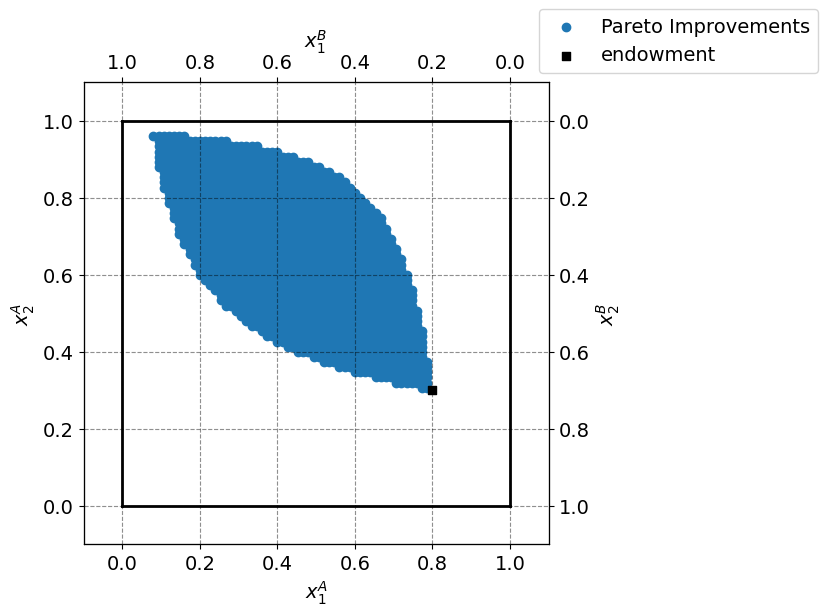

In [2]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# We create two empty lists to store valid combinations
valid_x1A = []
valid_x2A = []

# Set N
N = 75

# We iterate through the possible combinations of xA1 and xA2
for x1A in np.linspace(0, 1, N+1):
    for x2A in np.linspace(0, 1, N+1):
        x1B = 1 - x1A
        x2B = 1 - x2A
        
        # Check conditions
        if model.utility_A(x1A, x2A) >= model.utility_A(par.w1A, par.w2A) and model.utility_B(x1B, x2B) >= model.utility_B(1 - par.w1A, 1 - par.w2A):
            valid_x1A.append(x1A)
            valid_x2A.append(x2A)

# Plot the Edgeworth box
ax_A.scatter(valid_x1A, valid_x2A, label='Pareto Improvements')


# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='lower right',bbox_to_anchor=(1.6,1.0));

The blue area in the Edgeworth box above contains the allocations which are Pareto optimal. We see that area is located northwest for the endownment.

# Question 2

To calculate the error in the market clearing condition, we start by generating an array of evenly spaced numbers over the given interval of 0.5 to 2.5. Then we make a for loop where we iterate over the prices for p1 in P1. For each price we calculate the errors in the market clearing condition and print it. We also make a plot of the calculated errors. 

For p1 = 0.5, Error in market clearing for x1: 0.53, Error in market clearing for x2: -0.27
For p1 = 0.6, Error in market clearing for x1: 0.34, Error in market clearing for x2: -0.20
For p1 = 0.7, Error in market clearing for x1: 0.20, Error in market clearing for x2: -0.14
For p1 = 0.8, Error in market clearing for x1: 0.09, Error in market clearing for x2: -0.08
For p1 = 0.9, Error in market clearing for x1: 0.02, Error in market clearing for x2: -0.01
For p1 = 1.0, Error in market clearing for x1: -0.05, Error in market clearing for x2: 0.05
For p1 = 1.1, Error in market clearing for x1: -0.10, Error in market clearing for x2: 0.11
For p1 = 1.2, Error in market clearing for x1: -0.14, Error in market clearing for x2: 0.18
For p1 = 1.3, Error in market clearing for x1: -0.18, Error in market clearing for x2: 0.24
For p1 = 1.4, Error in market clearing for x1: -0.21, Error in market clearing for x2: 0.30
For p1 = 1.6, Error in market clearing for x1: -0.24, Error in market clearing f

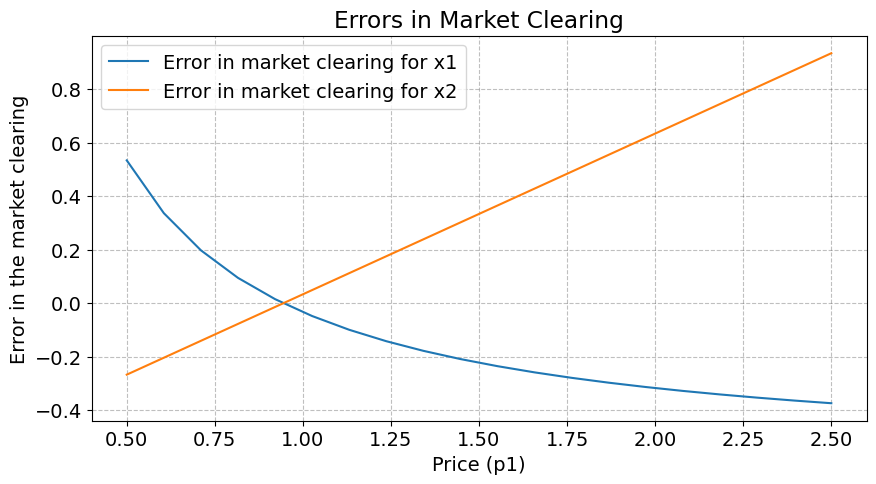

In [3]:
par = model.par

# Calculate P1
P1 = np.linspace(0.5, 2.5, num=20)

# Iterate over prices
for p1 in P1:
    # Calculate errors in market clearing condition
    eps1, eps2 = model.check_market_clearing(p1)
    
    # Print errors
    print(f"For p1 = {p1:.1f}, Error in market clearing for x1: {eps1:.2f}, Error in market clearing for x2: {eps2:.2f}")

# Lists to store errors
error_1 = []
error_2 = []
# Iterate over prices
for p1 in P1:
    # Calculate errors in market clearing condition
    eps1, eps2 = model.check_market_clearing(p1)
    
    # Append errors to lists
    error_1.append(eps1)
    error_2.append(eps2)
# Plotting errors
plt.figure(figsize=(10, 5))
plt.plot(P1, error_1, label='Error in market clearing for x1')
plt.plot(P1, error_2, label='Error in market clearing for x2')
plt.xlabel('Price (p1)')
plt.ylabel('Error in the market clearing')
plt.title('Errors in Market Clearing')
plt.grid(True)
plt.legend()
# Show plot
plt.show()

# Question 3

We will now find the market clearing price. It is the price that makes the errors for x1 and x2 as low as possible. In the figure in question 2 it can be seen, that the market clearing price is close to 1. We will now calculate the exact price.

To find the market clearing price we iterate over the prices p1 in P1. For each p1 we calculate the errors eps1 and eps2. We have set a variable min_error to infinity and the optimal_price is set to 'None'. 
For each price p1 we now calculate the total_error which is the sum of the error for x1 and x2. 
If total_error is less than the current minimum, it will update min_error to the value for total_error. When we have intereated over all the prices, it will gives us the market clearing price that corresponds to the minimum total_error. 

In [51]:
min_error = float('inf')  # Initialize minimum error to infinity
optimal_price = None  # Initialize optimal price to None

# Iterate over prices
for p1 in P1:
    # Calculate errors in market clearing condition
    eps1, eps2 = model.check_market_clearing(p1)
    
    # Calculate the total error
    total_error = eps1 + eps2
    
    # Compare and update minimum error and optimal price
    if total_error < min_error:
        min_error = total_error
        optimal_price = p1

x1A_optimal_3, x2A_optimal_3 = model.demand_A(optimal_price)
x1B_optimal_3, x2B_optimal_3 = model.demand_B(optimal_price)

# Output the optimal price
print(f"Optimal market clearing price: {optimal_price:.2f}")
print(f"Utility for A: {model.utility_A(x1A_optimal_3, x2A_optimal_3):.4f}")
print(f"Utility for B: {model.utility_B(x1B_optimal_3, x2B_optimal_3):.4f}")
print(f"The aggregated utility is: {model.utility_A(x1A_optimal_3, x2A_optimal_3) + model.utility_B(x1B_optimal_3, x2B_optimal_3):.4f}")

Optimal market clearing price: 0.92
Utility for A: 0.5639
Utility for B: 0.4942
The aggregated utility is: 1.0581


# Question 4.a

We will now find the allocation if only prices in P1 can be chosen. 
To do this we start by defining the maximal utility for A given p1 in P1. Then we iterate thorugh each p1 in P1, and if the demand for x1 and x2 is positive we store the utility for A. 
Finally, the code checks whether the calculated utility is greater than the maximum utility so far. If so, the maximal utility is updated to the new one with the correspond price. 

In [47]:
# Define maximal utility for A given p1 
def max_utility_for_A_given_p1(P1):
    max_utility = -np.inf
    max_utility_p1 = []

# Iterate through each p1 in P1
    for p1 in P1:
        if 1 - model.demand_B(p1)[0] > 0 and 1-model.demand_B(p1)[1]>0:
            # Store utility for A
            utility_A = model.utility_A(1 - model.demand_B(p1)[0], 1 - model.demand_B(p1)[1])
            # Check if utility is maximized
            if utility_A > max_utility:
                max_utility = utility_A
                max_utility_p1 = p1          
    return max_utility_p1, max_utility

price_A, utility_A = max_utility_for_A_given_p1(P1)
x1B_optimal_A, x2B_optimal_A = model.demand_B(price_A)

print("Price p1: {:.3f}".format(price_A))
print("Utility for A: {:.3f}".format(utility_A))
print(f'Allocation for the price above is: x1A = {model.demand_A(price_A)[0]:.3f} and x2A = {model.demand_A(price_A)[1]:.3f}')
print(f"Utility for B: {model.utility_B(x1B_optimal_A, x2B_optimal_A):.3f}")
print(f"The aggregated utility is: {utility_A + model.utility_B(x1B_optimal_A, x2B_optimal_A):.4f}")

Price p1: 1.868
Utility for A: 0.634
Allocation for the price above is: x1A = 0.320 and x2A = 1.196
Utility for B: 0.375
The aggregated utility is: 1.0081


# Question 4.b

Now we find the allocation if any positive price can be chosen. 
To do this, we will do the exact same as in 4.a, but for all positive prices, p in P. 

In [46]:
# Define the price range
P = np.linspace(0.01, 10, num=1000)

# Define maximal utility for A given p 
def max_utility_for_A_given_P(P):
    max_utility = -np.inf
    max_utility_p = []

# Iterate through each p in P
    for p in P:
        if 1 - model.demand_B(p)[0] > 0 and 1-model.demand_B(p)[1]>0:
            # Store utility for A
            utility_A = model.utility_A(1 - model.demand_B(p)[0], 1 - model.demand_B(p)[1])
            # Check if utility is maximized
            if utility_A > max_utility:
                max_utility = utility_A
                max_utility_p = p          
    return max_utility_p, max_utility

price_A2, utility_A2 = max_utility_for_A_given_P(P)
x1B_optimal_A2, x2B_optimal_A2 = model.demand_B(price_A2)

print("Price p1: {:.3f}".format(price_A2))
print("Utility for A: {:.3f}".format(utility_A2))
print(f'Allocation for the price above is: x1A = {model.demand_A(price_A2)[0]:.3f} and x2A = {model.demand_A(price_A2)[1]:.3f}')
print(f"Utility for B: {model.utility_B(x1B_optimal_A2, x2B_optimal_A2):.3f}")
print(f"The aggregated utility is: {utility_A2 + model.utility_B(x1B_optimal_A2, x2B_optimal_A2):.4f}")

Price p1: 1.900
Utility for A: 0.634
Allocation for the price above is: x1A = 0.319 and x2A = 1.213
Utility for B: 0.373
The aggregated utility is: 1.0061


# Question 5.a

Here we will find the allocation if the choice set is restricted to the Edgeworth box, C. 
We start by defining the utility function for A by returning the utility for A defined in inaguralproject.py. 
Then we create two empty lists for x1A and x2A. 
We now iterate through the possible combinations of x1A and x2A in C. We check whether the combinations is in C, if so, we store the utility for A. If the utility is higher than the maximal utility, we update the optimal allocation. 

In [26]:
# Define utility function for A
def utility_A(x1A, x2A):
    return model.utility_A(x1A, x2A)

# Initialize variables to store optimal allocation
optimal_x1A_5A = []
optimal_x2A_5A = []
max_utility = -np.inf

# Iterate through possible combinations of x1A and x2A in C
for x1A in np.linspace(0, 1, N+1):
    for x2A in np.linspace(0, 1, N+1):
        x1B = 1 - x1A
        x2B = 1 - x2A
        
        # Check if the combination is in C
        if model.utility_A(x1A, x2A) >= model.utility_A(par.w1A, par.w2A) and model.utility_B(x1B, x2B) >= model.utility_B(1 - par.w1A, 1 - par.w2A):
            # Store utility for A
            utility = utility_A(x1A, x2A)
            
            # Update optimal allocation if utility is higher
            if utility > max_utility:
                optimal_x1A_5A = x1A
                optimal_x2A_5A = x2A
                max_utility = utility

print("Optimal allocation for A:")
print(f"x1A: {optimal_x1A_5A:.3f}, x2A: {optimal_x2A_5A:.3f}")
print(f"Utility for A: {max_utility:.3f}")
print(f"Utility for B: {model.utility_B(1-optimal_x1A_5A, 1-optimal_x2A_5A):.3f}")
print(f"The aggregated utility is: {max_utility + model.utility_B(1-optimal_x1A_5A, 1-optimal_x2A_5A):.3f}")

Optimal allocation for A:
x1A: 0.560, x2A: 0.853
Utility for A: 0.742
Utility for B: 0.305
The aggregated utility is: 1.047


# Question 5.b

Then we will find the allocation if no further restrictions are imposed. 
We define the utility function for A. Then we define a constraint. This is to ensure that B's utility is not worse than in the initial endowment. We define bounds for x1A and x2A between 0 and 1 for both of them, as given in the assignment. 
We now make an optimization by using the minimize from scipy.optimize. This function finds the optimal allocation of good 1 and good 2 for consumer A by minimizing the negative utility function for A under the constraints.
Then we print the optimal allocation for A and the corresponding utility.

In [34]:
# Define utility function for A
def utility_A(x):
    return -model.utility_A(x[0], x[1])  # Minimize negative utility for maximization

# Define constraint function
def constraint(x):
    return model.utility_B(1 - x[0], 1 - x[1]) - model.utility_B(par.w1A, par.w2A)

# Initial guess
x0 = [0.5, 0.5]

# Define bounds for x1A and x2A
bounds = [(0, 1), (0, 1)]

# Define constraint dictionary
constraint_dict = {'type': 'ineq', 'fun': constraint}

# Perform optimization
result = minimize(utility_A, x0, bounds=bounds, constraints=constraint_dict)

# Extract optimal allocation for A
optimal_x1A_5B, optimal_x2A_5B = result.x

# Calculate utility for A
max_utility = -result.fun

print("Optimal allocation for A:")
print(f"x1A: {optimal_x1A_5B:.3f}, x2A: {optimal_x2A_5B:.3f}")
print(f"Utility for A: {max_utility:.3f}")
print(f"Utility for B: {model.utility_B(1-optimal_x1A_5B, 1-optimal_x2A_5B):.3f}")
print(f"The aggregated utility is: {max_utility + model.utility_B(1-optimal_x1A_5B, 1-optimal_x2A_5B):.4f}")

Optimal allocation for A:
x1A: 0.289, x2A: 0.620
Utility for A: 0.481
Utility for B: 0.577
The aggregated utility is: 1.0577


# Question 6.a


We will find the allocation if A's and B's consumption are chosen by a utilitarian social planner to maximize the aggregate utility.
We will use the same method as in 5.b, but with the new maximization function.


In [32]:
# Define the utility function to maximize aggregate utility
def utility(x):
    return -model.utility_A(x[0], x[1]) - model.utility_B(1 - x[0], 1 - x[1])

# Define the initial guess
x0 = [0.5, 0.5]

# Define the bounds for xA1 and xA2
bounds = [(0, 1), (0, 1)]

# Perform optimization
result = minimize(utility, x0, bounds=bounds)

# Extract optimal allocation for A and B
optimal_x1A_6A, optimal_x2A_6A = result.x
optimal_x1B_6A = 1 - optimal_x1A_6A
optimal_x2B_6A = 1 - optimal_x2A_6A

# Print the results
print(f"Optimal allocation for A: x1A = {optimal_x1A_6A:.3f}, x2A = {optimal_x2A_6A:.3f}")
print(f"Optimal allocation for B: x1B = {optimal_x1B_6A:.3f}, x2B = {optimal_x2B_6A:.3f}")
print(f"Utility for A: {model.utility_A(optimal_x1A_6A, optimal_x2A_6A):.3f}")
print(f"Utility for B: {model.utility_B(optimal_x1B_6A, optimal_x2B_6A):.3f}")
print(f"The aggregated utility is: {model.utility_A(optimal_x1A_6A, optimal_x2A_6A) + model.utility_B(optimal_x1B_6A, optimal_x2B_6A):.4f}")

Optimal allocation for A: x1A = 0.333, x2A = 0.667
Optimal allocation for B: x1B = 0.667, x2B = 0.333
Utility for A: 0.529
Utility for B: 0.529
The aggregated utility is: 1.0583


# Question 6.b

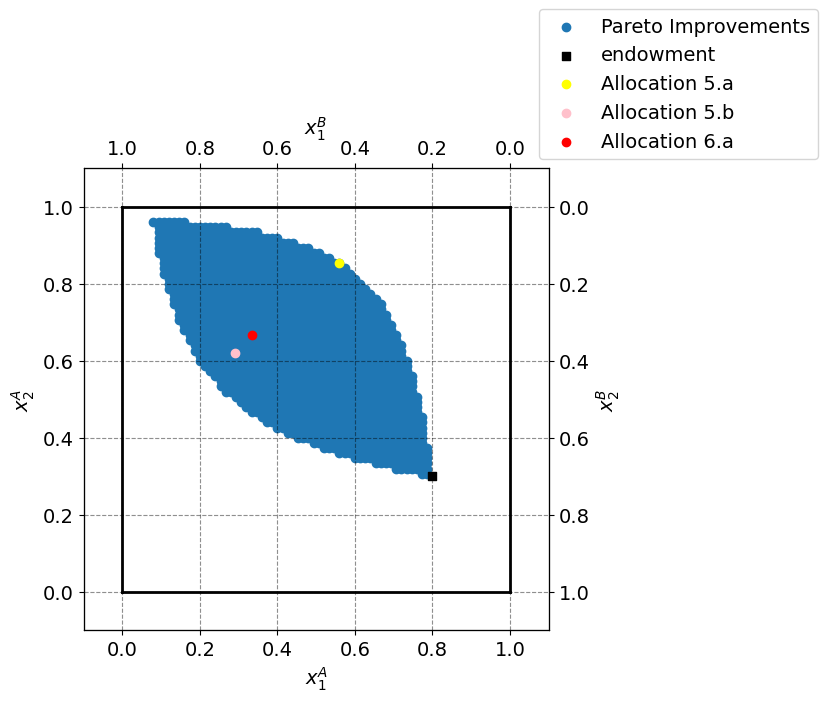

In [11]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# We create two empty lists to store valid combinations
valid_x1A = []
valid_x2A = []

# Set N
N = 75

# We iterate through the possible combinations of xA1 and xA2
for x1A in np.linspace(0, 1, N+1):
    for x2A in np.linspace(0, 1, N+1):
        x1B = 1 - x1A
        x2B = 1 - x2A
        
        # Check conditions
        if model.utility_A(x1A, x2A) >= model.utility_A(par.w1A, par.w2A) and model.utility_B(x1B, x2B) >= model.utility_B(1 - par.w1A, 1 - par.w2A):
            valid_x1A.append(x1A)
            valid_x2A.append(x2A)

# Plot the Edgeworth box
ax_A.scatter(valid_x1A, valid_x2A, label='Pareto Improvements')


# A
ax_A.scatter(par.w1A,par.w2A,marker='s', color='black', label='endowment')
ax_A.scatter(optimal_x1A_5A,optimal_x2A_5A, color='yellow', label='Allocation 5.a')
ax_A.scatter(optimal_x1A_5B,optimal_x2A_5B, color='pink', label='Allocation 5.b')
ax_A.scatter(optimal_x1A_6A,optimal_x2A_6A, color='red', label='Allocation 6.a')


optimal_x1A = []
optimal_x2A = []


# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='lower right',bbox_to_anchor=(1.6,1.0));

In [ ]:
questions_numbers = np.array([1, 2, 3, 4, 5, 6])  # Numerical values for positioning
questions_labels = ['Question 3', 'Question 4.a', 'Question 4.b', 'Question 5.a', 'Question 5.b', 'Question 6.a']  # Labels for x-axis
uA = [0.41, 0.63, 0.74, 0.52]
uB = [0.3, 0.37, 0.3, 0.53]
Aggr = [0.71, 1.0, 1.04, 1.05]

# Plotting
plt.figure(figsize=(10, 6))

# Plot for uA with dots connected
plt.plot(questions_numbers, uA, '-o', label='Utility of A', color='blue')
# Plot for uB with dots connected
plt.plot(questions_numbers, uB, '-o', label='Utility of B', color='orange')
# Plot for Aggr with dots connected
plt.plot(questions_numbers, Aggr, '-o', label='Aggregate Utility', color='green')

plt.title('Utilities Across Questions')
plt.xlabel('Question Number')
plt.ylabel('Utility')
plt.xticks(questions_numbers, questions_labels)  # Set custom labels for the x-axis
plt.grid(True)
plt.legend()
plt.show()

# Question 7

We will now draw a random set W with 50 elements.
We do this by generating random numbers from a uniform distribution for w1A and w2A. Then we plot it in a figure. 

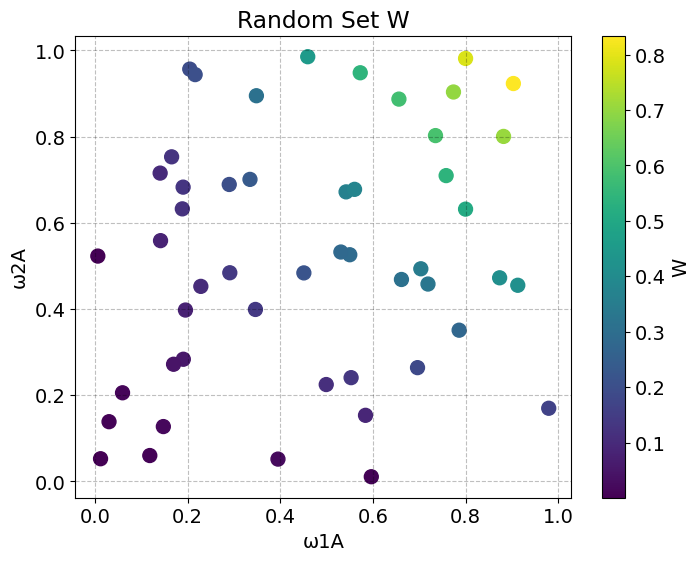

In [12]:
# Number of elements in the set
num_elements = 50

# Generate random numbers for w1A and w2A
w1A = np.random.uniform(0, 1, num_elements)
w2A = np.random.uniform(0, 1, num_elements)

# Calculate W
W = np.mod(w1A * w2A, 1)

# Plot the set W
plt.figure(figsize=(8, 6))
plt.scatter(w1A, w2A, c=W, cmap='viridis', s=100)
plt.colorbar(label='W')
plt.xlabel('ω1A')
plt.ylabel('ω2A')
plt.title('Random Set W')
plt.grid(True)
plt.show()

The figure above shows a plot of the random set, W, with 50 elements.

# Question 8

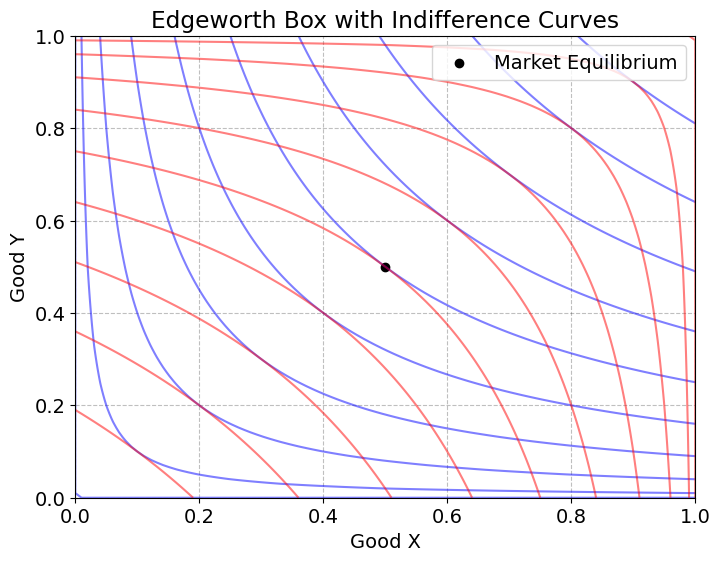

In [13]:
def utility_consumer_1(x, y):
    return x**0.5 * y**0.5

def utility_consumer_2(x, y):
    return (1-x)**0.5 * (1-y)**0.5

total_goods = 1
grid_size = 100
x_values = np.linspace(0, total_goods, grid_size)
y_values = np.linspace(0, total_goods, grid_size)
X, Y = np.meshgrid(x_values, y_values)

utility_1 = utility_consumer_1(X, Y)
utility_2 = utility_consumer_2(X, Y)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, utility_1, alpha=0.5, levels=10, colors='blue')
plt.contour(X, Y, utility_2, alpha=0.5, levels=10, colors='red')
plt.xlabel('Good X')
plt.ylabel('Good Y')
plt.title('Edgeworth Box with Indifference Curves')
plt.grid(True)
plt.xlim(0, total_goods)
plt.ylim(0, total_goods)

# Find and plot market equilibrium allocation
x_eq = 0.5
y_eq = 0.5
plt.scatter(x_eq, y_eq, color='black', label='Market Equilibrium')
plt.legend()
plt.show()

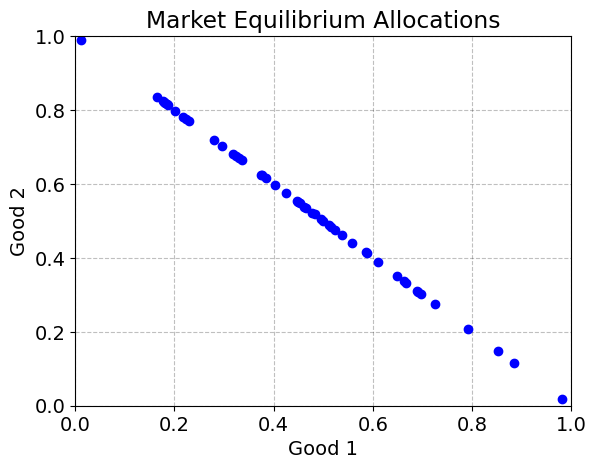

In [14]:
# Calculate the allocations for each wA in W
allocations = []
for i in range(num_elements):
    # Calculate the allocation for omegaA
    x1A = w1A[i] / (w1A[i] + w2A[i])
    x2A = w2A[i] / (w1A[i] + w2A[i])
    allocations.append((x1A, x2A))

# Plot the allocations in the Edgeworth box
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('Good 1')
ax.set_ylabel('Good 2')
ax.set_title('Market Equilibrium Allocations')

# Plot each allocation
for allocation in allocations:
    ax.plot(allocation[0], allocation[1], 'bo')  # 'bo' for blue circles

plt.grid(True)
plt.show()